In [ ]:
# Importing libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [7]:
apartments = pd.read_csv('BakuApartmentData.csv', index_col='Unnamed: 0')

In [8]:
apartments.rename_axis('No')

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
No,,,,,,,,,
0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,755000,Səbail r.,4,210.0,7/18,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1
...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9/9,0,0,1,0
39298,102500,Memar Əcəmi m.,2,48.0,3/5,0,0,1,0
39299,143500,İnşaatçılar m.,3,65.0,3/5,0,0,1,0


In [11]:
apartments['floor'] = apartments['floor'].str.split('/').str[0]
apartments['floor'].head()
apartments['floor'] = apartments['floor'].astype('int64')

In [ ]:
# Target variable (y) = Price
# Independent variables (x) = rooms, floor, new_building

In [14]:
x = apartments[['rooms','floor','new_building']]
y = apartments['price']

In [15]:
# Spliting data for training and testing
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2)

In [16]:
# creating the model
model = lr()
# fitting the training data to teach the model
model.fit(x_train, y_train)

LinearRegression()

In [19]:
predictions = model.predict(x_test)

In [20]:
r2 = r2(y_test,predictions)
r2

0.42634287886485034

In [23]:
coef = model.coef_
coef

array([117817.34679537,    246.36432562,  83412.54749484])

In [26]:
intercep = model.intercept_
intercep

-164038.62246792272

In [31]:
# This tells you how far off, on average, your model's predictions are from the actual values. A lower MAE is better.
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test,predictions)
mae

74466.87985351872

In [32]:
# MSE is another common evaluation metric. It squares the differences between the actual and predicted values, making larger errors more significant.
mse = mse(y_test,predictions)
mse

15002693567.525478

In [33]:
# visualizing
import matplotlib.pyplot as plt

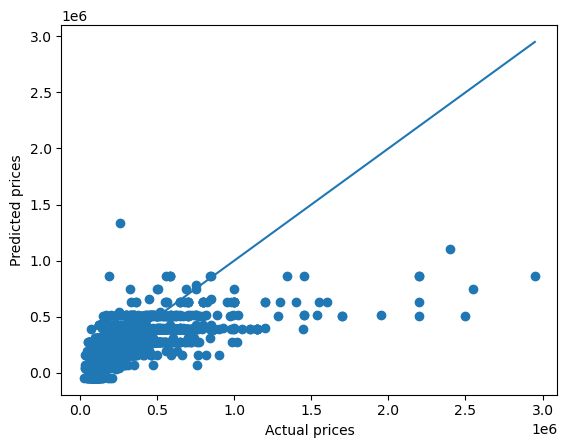

In [34]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

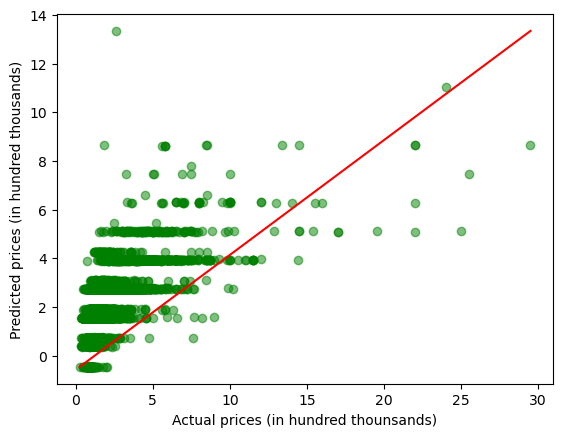

In [61]:
scaled_actual = y_test/100000
scaled_predictions = predictions/100000
plt.scatter(scaled_actual,scaled_predictions,color='green', alpha=0.5)
plt.plot([scaled_actual.min(),scaled_actual.max()],[scaled_predictions.min(),scaled_predictions.max()], color='red', alpha=1)
plt.xlabel('Actual prices (in hundred thounsands)')
plt.ylabel('Predicted prices (in hundred thousands)')
plt.show()